In [16]:
import os
import cv2
import PIL
import json
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from PIL import Image
from visdial.data import VisDialDataset
from visdial.utils.image_utils import *
dir_path = '/home/quang/datasets/raw_images/VisualDialog_val2018'
pattern = 'VisualDialog_val2018_000000{:06d}.jpg'


In [17]:
config_path = '/home/quang/checkpoints/s11/config.json'
with open(config_path) as file:
    config = json.load(file)

In [18]:
dataset = VisDialDataset(config, split='val')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

[val2018] Tokenizing questions...
[val2018] Tokenizing answers...
[val2018] Tokenizing captions...


In [19]:
for batch in dataloader:
    break

img_id = batch['img_ids'][0]
boxes = batch['boxes'][0].numpy()
scores = np.ones(len(boxes))
img_path = img_id_to_path(img_id, dir_path, pattern)
img = Image.open(img_path)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


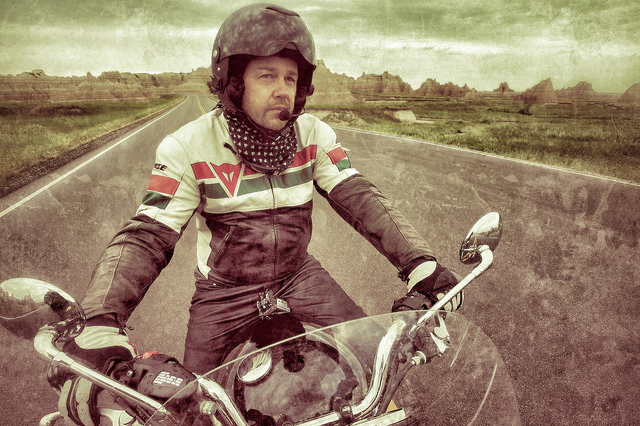

In [20]:
img

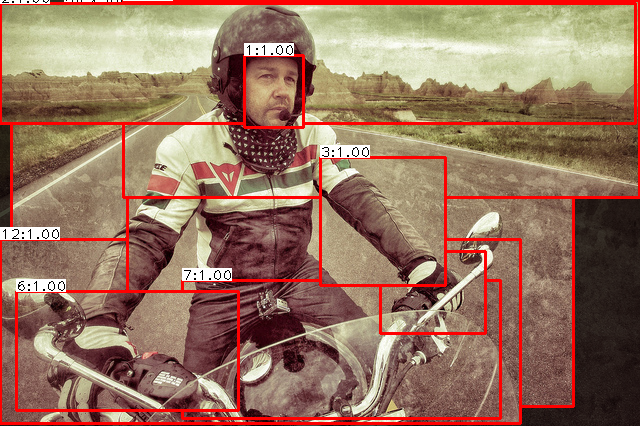

In [21]:
Image.fromarray(draw_boxes_with_scores(np.array(img), boxes, scores, topk=20))

In [28]:
import torch
from visdial.model import get_model

In [23]:
config['model']['debug'] = True

In [26]:
model = get_model(config)
model.decoder.gen_decoder = None


In [29]:
model.load_state_dict(torch.load('/home/quang/checkpoints/s11/checkpoint_11.pth')['model'])

<All keys matched successfully>

In [31]:
device = 'cuda:0'
model = model.to(device)
model.eval()

VisdialModel(
  (encoder): Encoder(
    (text_encoder): TextEncoder(
      (text_embedding): Embedding(11322, 300, padding_idx=0)
      (hist_encoder): HistEncoder(
        (hist_linear): Linear(in_features=1024, out_features=512, bias=True)
        (hist_lstm): DynamicRNN(
          (rnn_module): LSTM(300, 512, num_layers=2, batch_first=True, bidirectional=True)
        )
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (pos_embedding): PositionalEmbedding()
      )
      (ques_encoder): QuesEncoder(
        (ques_linear): Linear(in_features=1024, out_features=512, bias=True)
        (ques_lstm): DynamicRNN(
          (rnn_module): LSTM(300, 512, num_layers=2, batch_first=True, bidirectional=True)
        )
        (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (pos_embedding): PositionalEmbedding()
      )
    )
    (img_encoder): ImageEncoder(
      (img_linear): Sequential(
        (0): Linear(in_features=2048, out_fea

In [32]:
torch.cuda.empty_cache()
for key in batch:
    batch[key] = batch[key].to(device)

In [33]:
output = model(batch)

In [39]:
w_a = model.encoder.attn_encoder.cross_attn_encoder[0].attns[0].attn_X_guided_by_Y

In [40]:
w_a.shape

torch.Size([10, 102, 22])